In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
path = '../Data'

train = pd.read_csv(os.path.join(path, 'train.csv'))

In [3]:
print(train.head())
print(train.info())
print(train.describe())

        id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   
2  p233823  a9b876a9252e08a55e3d894150f75ba3            Ms.           UT   
3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.           NC   
4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.           CA   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          Grades PreK-2   
1        2017-04-26 15:57:28             Grades 3-5   
2        2017-01-01 22:57:44             Grades 3-5   
3        2016-08-12 15:42:11             Grades 3-5   
4        2016-08-06 09:09:11             Grades 6-8   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   
3                      Health & Sports   
4 

In [4]:
train.describe(include='all')

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
count,182080,182080,182076,182080,182080,182080,182080,182080,182080,182080,182080,6374,6374,182080,182080.000000,182080.000000
unique,182080,104414,5,51,180439,4,51,407,164282,147689,180984,6359,6336,179730,NaN,NaN
top,p129097,fa2f220b537e8653fb48878ebb38044d,Mrs.,CA,2016-09-01 00:00:03,Grades PreK-2,Literacy & Language,Literacy,Flexible Seating,As a teacher in a low-income/high poverty scho...,Students will be using Chromebooks to increase...,These resources will provide students with acc...,"Having taught engineering in college, I have c...",My students need electronic tablets to do all ...,NaN,NaN
freq,1,74,95405,25695,30,73890,39257,15775,377,46,24,2,3,84,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.237055,0.847682
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.016086,0.359330
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,1.000000


In [5]:
print('Percentage of approved projects are {}'.format(train['project_is_approved'].value_counts()[1]/train.shape[0]))
print('Percentage of un-approved projects are {}'.format(train['project_is_approved'].value_counts()[0]/train.shape[0]))

Percentage of approved projects are 0.8476823374340949
Percentage of un-approved projects are 0.1523176625659051


In [4]:
resources = pd.read_csv(os.path.join(path, 'resources.csv'))
resources.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [7]:
print(resources.shape)
print(resources.info())

(1541272, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
id             1541272 non-null object
description    1540980 non-null object
quantity       1541272 non-null int64
price          1541272 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB
None


In [8]:
resources.describe(include='all')

,id,description,quantity,price
count,1541272,1540980,1.541272e+06,1.541272e+06
unique,260115,332928,NaN,NaN
top,p009778,Apple - iPad� mini 2 with Wi-Fi - 16GB - Space...,NaN,NaN
freq,100,3037,NaN,NaN
mean,NaN,NaN,2.860509e+00,5.028398e+01
std,NaN,NaN,7.570345e+00,1.447326e+02
min,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,1.000000e+00,7.900000e+00
50%,NaN,NaN,1.000000e+00,1.499000e+01
75%,NaN,NaN,2.000000e+00,3.980000e+01


In [5]:
resources_agg = resources[['id', 'quantity', 'price']].groupby('id').agg({'quantity': ['sum', 'min', 'max', 'mean', 'std'],
                                                                         'price': ['sum', 'min', 'max', 'mean', 'std']}).reset_index()

In [10]:
resources_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260115 entries, 0 to 260114
Data columns (total 11 columns):
(id, )              260115 non-null object
(quantity, sum)     260115 non-null int64
(quantity, min)     260115 non-null int64
(quantity, max)     260115 non-null int64
(quantity, mean)    260115 non-null float64
(quantity, std)     186052 non-null float64
(price, sum)        260115 non-null float64
(price, min)        260115 non-null float64
(price, max)        260115 non-null float64
(price, mean)       260115 non-null float64
(price, std)        186052 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 21.8+ MB


In [9]:
resources_agg.head()

id quantity                                price                 \
                sum min max      mean       std      sum    min     max   
0  p000001        7   1   2  1.750000  0.500000   459.56  23.99  261.08   
1  p000002       21   1   4  1.500000  0.854850   515.89   8.46  134.90   
2  p000003        4   1   1  1.000000  0.000000   298.97  39.99  169.00   
3  p000004       98   1   2  1.031579  0.175804  1113.69   1.60  401.54   
4  p000005        8   1   3  2.000000  1.154701   485.99  54.08  323.75   

                           
         mean         std  
0  114.890000  101.929679  
1   36.849286   33.549557  
2   74.742500   63.014906  
3   11.723053   40.608577  
4  121.497500  134.835000

In [6]:
resources_agg.columns = ['_'.join(cols) for cols in resources_agg.columns]
resources_agg.rename(columns={'id_' : 'id'}, inplace=True)

In [9]:
resources_agg.head()

,id,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_std,price_sum,price_min,price_max,price_mean,price_std
0,p000001,7,1,2,1.750000,0.500000,459.56,23.99,261.08,114.890000,101.929679
1,p000002,21,1,4,1.500000,0.854850,515.89,8.46,134.90,36.849286,33.549557
2,p000003,4,1,1,1.000000,0.000000,298.97,39.99,169.00,74.742500,63.014906
3,p000004,98,1,2,1.031579,0.175804,1113.69,1.60,401.54,11.723053,40.608577
4,p000005,8,1,3,2.000000,1.154701,485.99,54.08,323.75,121.497500,134.835000


In [10]:
test = pd.read_csv(os.path.join(path, 'test.csv'))
print(test.head())
print(test.info())

        id                        teacher_id teacher_prefix school_state  \
0  p233245  5724a0c3ce11008366fff36dab4b943c            Ms.           CA   
1  p096795  445619941dc7cbe81c7be109dc61a56a           Mrs.           SC   
2  p236235  e92a4902b1611a189643d6f12c51e6a0           Mrs.           SC   
3  p233680  8e92622d2985d3faac1de71609c4be72           Mrs.           IA   
4  p171879  91a3c89981f626d9a0d067c65fb186ce            Mr.           CA   

  project_submitted_datetime project_grade_category  \
0        2016-04-27 13:45:41          Grades PreK-2   
1        2016-04-28 12:43:56             Grades 3-5   
2        2016-04-29 21:16:05          Grades PreK-2   
3        2016-04-27 22:32:43          Grades PreK-2   
4        2016-04-27 18:59:15             Grades 6-8   

            project_subject_categories      project_subject_subcategories  \
0                     Music & The Arts                        Visual Arts   
1  Literacy & Language, Math & Science  Literature & Writi

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
train.dtypes

id                                              object
teacher_id                                      object
teacher_prefix                                  object
school_state                                    object
project_submitted_datetime                      object
project_grade_category                          object
project_subject_categories                      object
project_subject_subcategories                   object
project_title                                   object
project_essay_1                                 object
project_essay_2                                 object
project_essay_3                                 object
project_essay_4                                 object
project_resource_summary                        object
teacher_number_of_previously_posted_projects     int64
project_is_approved                              int64
dtype: object

In [7]:
train_res = train.merge(resources_agg, how='left', on='id')
train_res.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_std,price_sum,price_min,price_max,price_mean,price_std
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,6,3,3,3.0,0.0,299.98,149.99,149.99,149.990,0.000000
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,20,20,20.0,NaN,20.00,20.00,20.00,20.000,NaN
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,1,1,1,1.0,NaN,469.99,469.99,469.99,469.990,NaN
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,5,1,1,1.0,0.0,684.47,18.95,354.99,136.894,133.428098
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,2,2,2,2.0,NaN,355.50,355.50,355.50,355.500,NaN


In [17]:
len(train_res['id'].unique())

182080

In [18]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 26 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [8]:
train_res['project_essay'] = train_res.apply(lambda row: ' '.join([str(row['project_essay_1']),
                                                                  str(row['project_essay_2']),
                                                                  str(row['project_essay_3']),
                                                                  str(row['project_essay_4']),]), axis=1)

In [20]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 27 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [21]:
train_res.isna().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       4
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 175706
project_essay_4                                 175706
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
quantity_sum                                         0
quantity_min                                         0
quantity_m

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


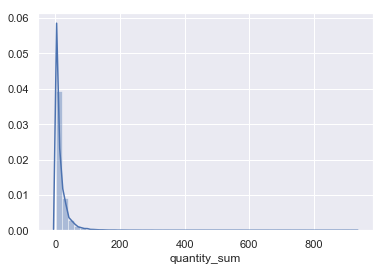

In [22]:
sns.set()
sns.distplot(train_res['quantity_sum'])

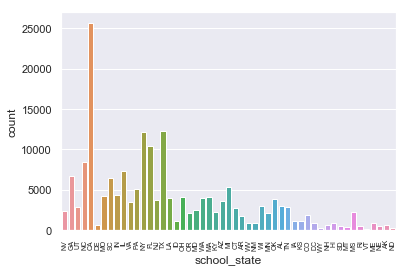

In [36]:
fontdict = {'fontsize': '7'}
sns.set()
g = sns.countplot(x='school_state', data=train_res)
_, label = plt.xticks()
g.set_xticklabels(label, rotation=90, fontdict=fontdict)
plt.show()

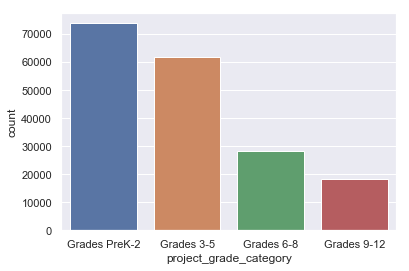

In [38]:
sns.set()
g = sns.countplot(x='project_grade_category', data=train_res)
# _, label = plt.xticks()
# g.set_xticklabels(label, rotation=90, fontdict=fontdict)
plt.show()

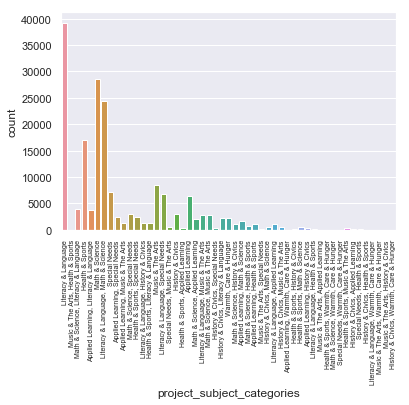

In [41]:
sns.set()
g = sns.countplot(x='project_subject_categories', data=train_res)
_, label = plt.xticks()
g.set_xticklabels(label, rotation=90, fontdict=fontdict)
plt.show()

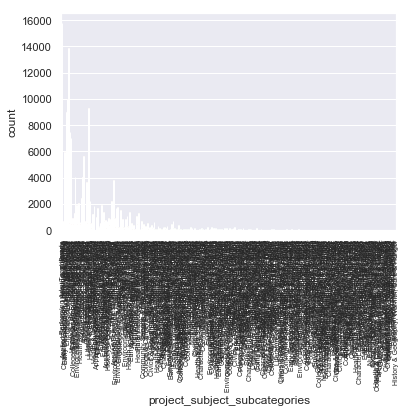

In [42]:
sns.set()
g = sns.countplot(x='project_subject_subcategories', data=train_res)
_, label = plt.xticks()
g.set_xticklabels(label, rotation=90, fontdict=fontdict)
plt.show()

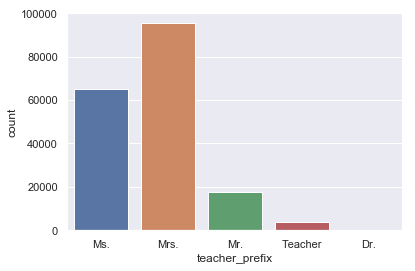

In [44]:
sns.set()
g = sns.countplot(x='teacher_prefix', data=train_res)
# _, label = plt.xticks()
# g.set_xticklabels(label, rotation=90, fontdict=fontdict)
plt.show()

In [53]:
train_res.dtypes

id                                               object
teacher_id                                       object
teacher_prefix                                   object
school_state                                     object
project_submitted_datetime                       object
project_grade_category                           object
project_subject_categories                       object
project_subject_subcategories                    object
project_title                                    object
project_essay_1                                  object
project_essay_2                                  object
project_essay_3                                  object
project_essay_4                                  object
project_resource_summary                         object
teacher_number_of_previously_posted_projects      int64
project_is_approved                               int64
quantity_sum                                      int64
quantity_min                                    

Analysis of numerical values

In [16]:
numerical_data = train_res.iloc[:, [15,16,17,18,19,21,22,23,24]]

In [17]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 9 columns):
project_is_approved    182080 non-null int64
quantity_sum           182080 non-null int64
quantity_min           182080 non-null int64
quantity_max           182080 non-null int64
quantity_mean          182080 non-null float64
price_sum              182080 non-null float64
price_min              182080 non-null float64
price_max              182080 non-null float64
price_mean             182080 non-null float64
dtypes: float64(5), int64(4)
memory usage: 13.9 MB


In [18]:
numerical_data['quantity_sum'] = numerical_data['quantity_sum'].astype('float64')
numerical_data['quantity_min'] = numerical_data['quantity_min'].astype('float64')
numerical_data['quantity_max'] = numerical_data['quantity_max'].astype('float64')

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [25]:
numerical_data.columns

Index(['project_is_approved', 'quantity_sum', 'quantity_min', 'quantity_max',
       'quantity_mean', 'price_sum', 'price_min', 'price_max', 'price_mean'],
      dtype='object')

In [20]:
numerical_data.describe()

,project_is_approved,quantity_sum,quantity_min,quantity_max,quantity_mean,price_sum,price_min,price_max,price_mean
count,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000
mean,0.847682,16.971447,4.107354,7.666070,5.234677,297.731304,90.902456,178.380353,122.430852
std,0.359330,26.241957,11.604126,15.994654,12.092317,366.718002,271.538578,307.067793,274.554270
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.660000,0.000000,0.270000,0.256667
25%,1.000000,4.000000,1.000000,1.000000,1.000000,104.480000,6.590000,39.990000,20.146885
50%,1.000000,9.000000,1.000000,3.000000,2.000000,205.980000,15.990000,99.500000,51.413000
75%,1.000000,21.000000,2.000000,6.000000,4.400000,379.000000,73.270000,221.012500,141.645000
max,1.000000,930.000000,800.000000,800.000000,800.000000,9999.000000,9999.000000,9999.000000,9999.000000


In [21]:
numerical_data.isna().sum()

project_is_approved    0
quantity_sum           0
quantity_min           0
quantity_max           0
quantity_mean          0
price_sum              0
price_min              0
price_max              0
price_mean             0
dtype: int64

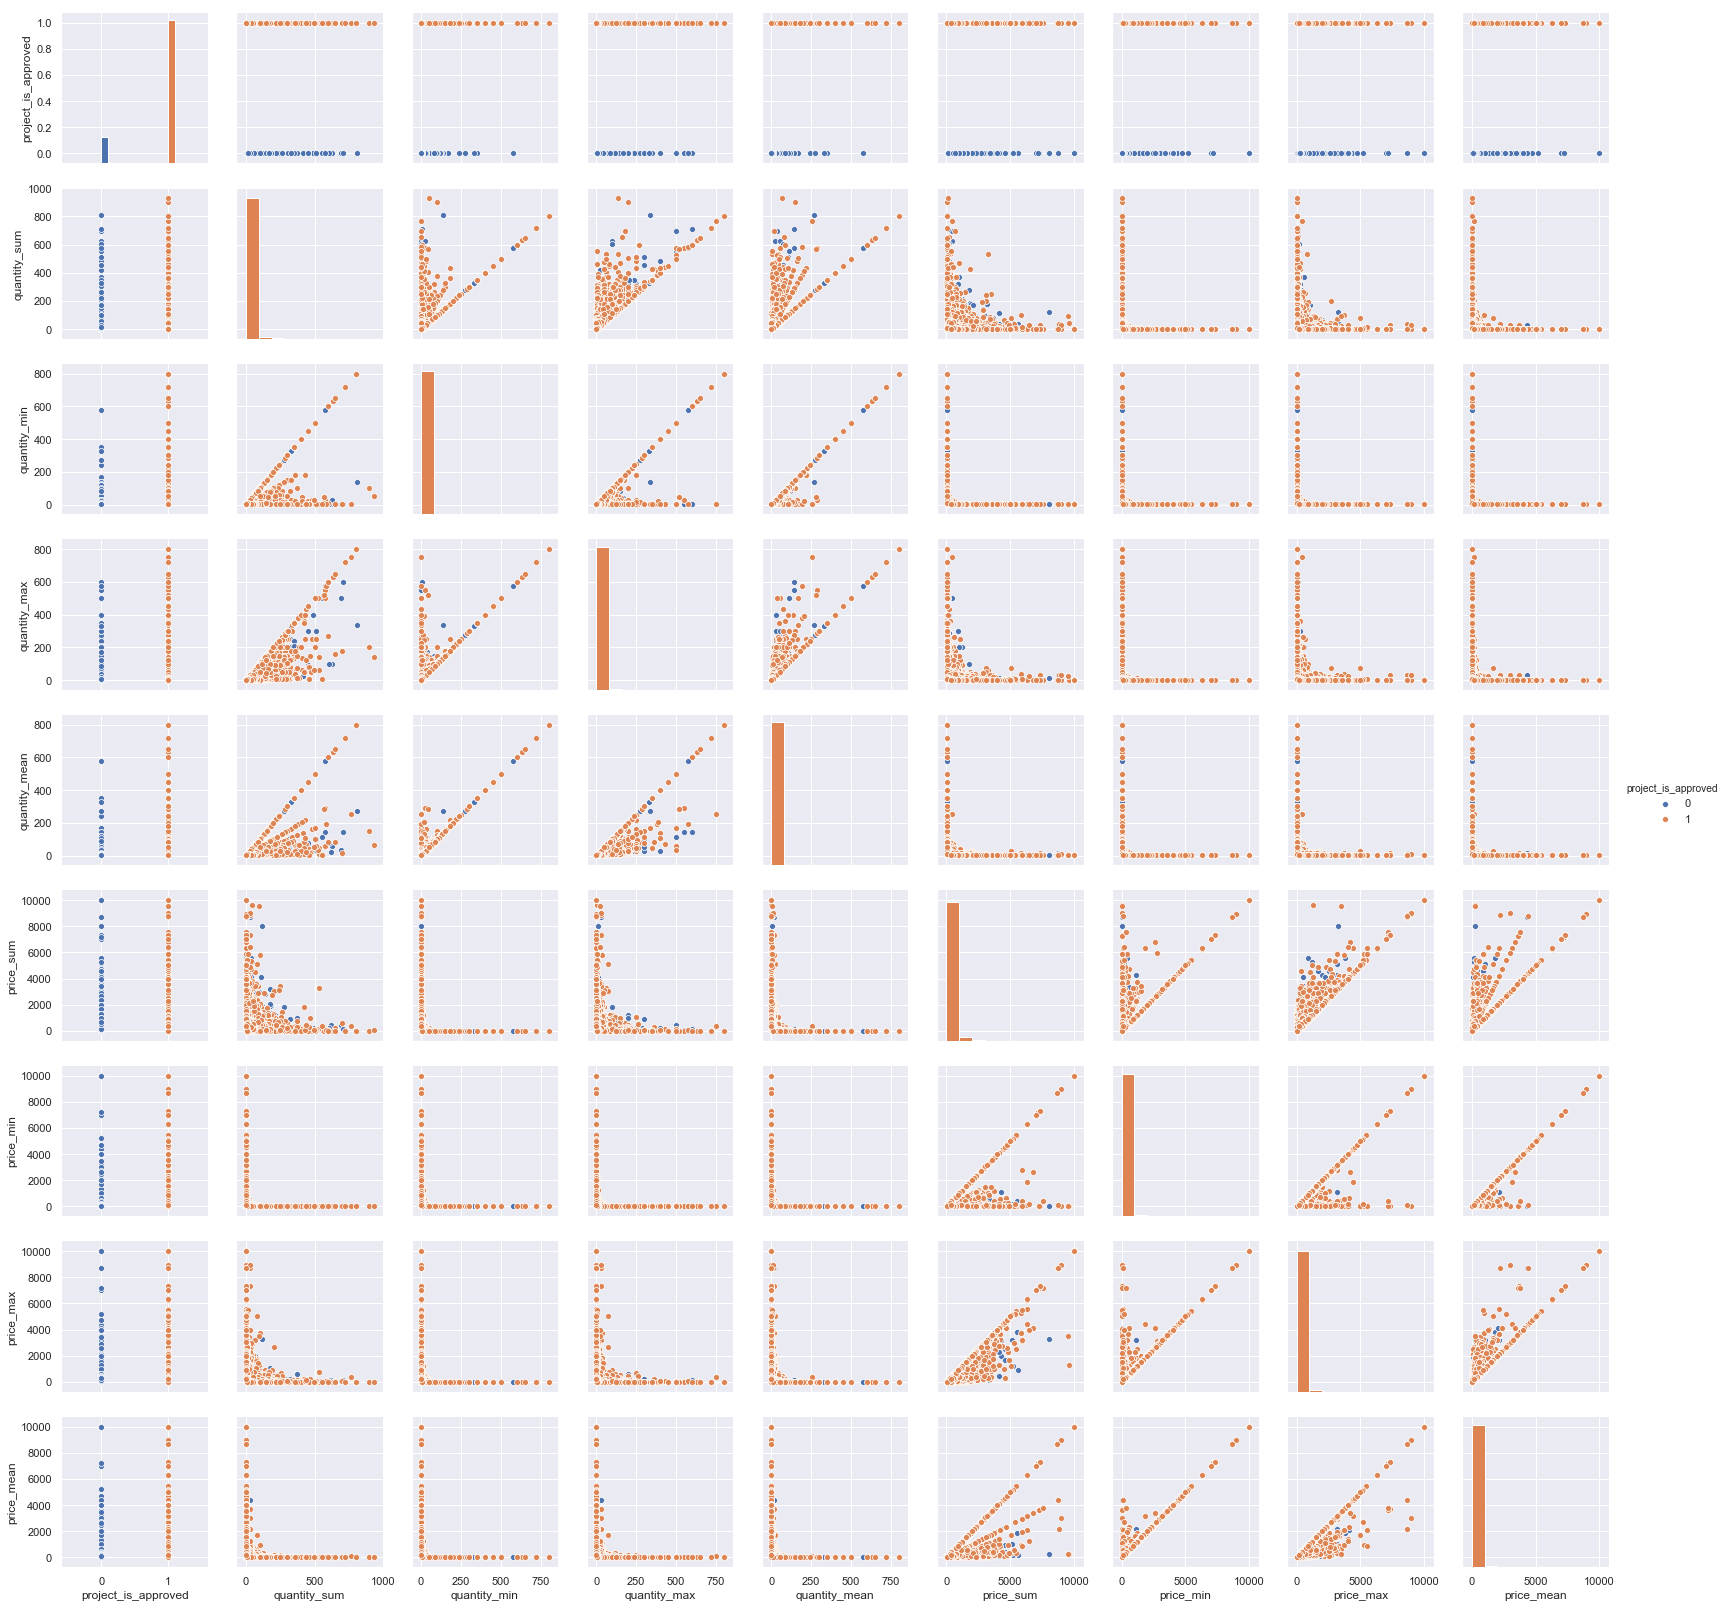

In [66]:
sns.set()
sns.pairplot(numerical_data, hue='project_is_approved', diag_kind='hist')

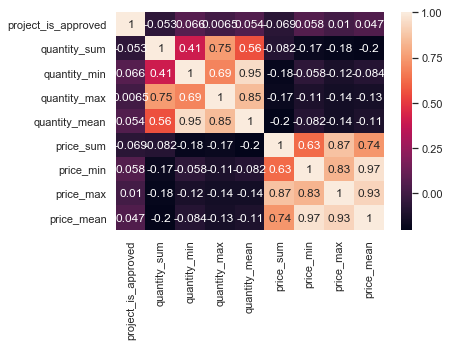

In [68]:
corr = numerical_data.corr()

sns.heatmap(corr, annot=True)

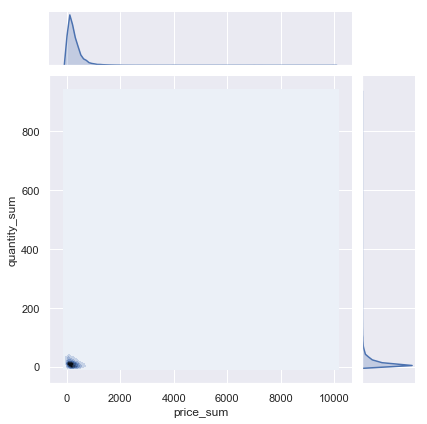

In [86]:
sns.jointplot('price_sum', 'quantity_sum', data=numerical_data, kind='kde')

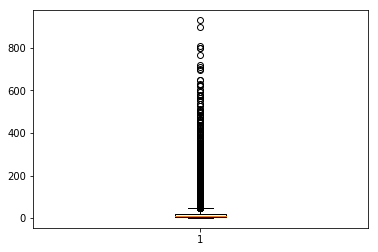

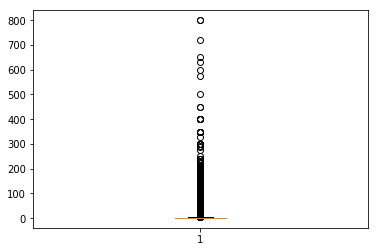

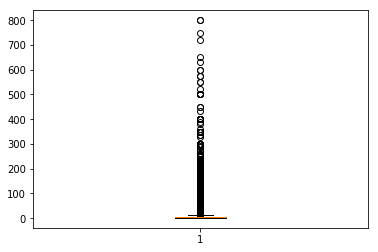

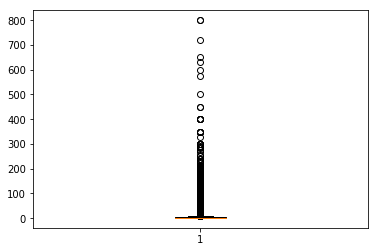

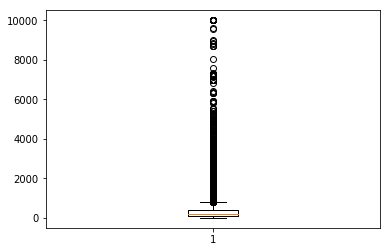

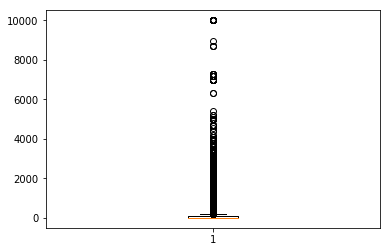

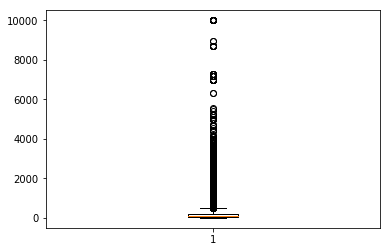

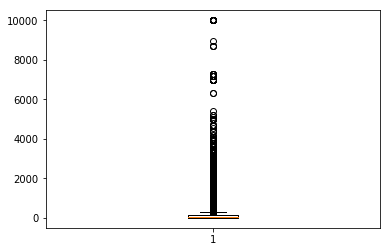

In [26]:
col = ['quantity_sum', 'quantity_min', 'quantity_max',
       'quantity_mean', 'price_sum', 'price_min', 'price_max', 'price_mean']

for c in col:
    plt.boxplot(numerical_data[c])
    plt.show()

In [28]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 27 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

Feature engineering with text column and date column

In [29]:
train_res.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,quantity_min,quantity_max,quantity_mean,quantity_std,price_sum,price_min,price_max,price_mean,price_std,project_essay
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,3,3,3.0,0.0,299.98,149.99,149.99,149.990,0.000000,Most of my kindergarten students come from low...
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,20,20,20.0,NaN,20.00,20.00,20.00,20.000,NaN,Our elementary school is a culturally rich sch...
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,1,1,1.0,NaN,469.99,469.99,469.99,469.990,NaN,Hello;\r\nMy name is Mrs. Brotherton. I teach ...
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,1,1,1.0,0.0,684.47,18.95,354.99,136.894,133.428098,My students are the greatest students but are ...
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,2,2,2.0,NaN,355.50,355.50,355.50,355.500,NaN,My students are athletes and students who are ...


In [9]:
train_res['project_submitted'] = pd.to_datetime(train_res['project_submitted_datetime'], format='%Y-%m-%d %H:%M:%S')

In [32]:
print(train_res.head())
print(train_res.info())

        id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   
2  p233823  a9b876a9252e08a55e3d894150f75ba3            Ms.           UT   
3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.           NC   
4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.           CA   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          Grades PreK-2   
1        2017-04-26 15:57:28             Grades 3-5   
2        2017-01-01 22:57:44             Grades 3-5   
3        2016-08-12 15:42:11             Grades 3-5   
4        2016-08-06 09:09:11             Grades 6-8   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   
3                      Health & Sports   
4 

In [39]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 29 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [10]:
def datetime_features(data, datetime):
    data['Day_of_week'] = data[datetime].apply(lambda x: x.strftime('%A'))
    data['hour'] = data[datetime].apply(lambda x: x.strftime('%H'))
    data['minute'] = data[datetime].apply(lambda x: x.strftime('%M'))
    data['Month_of_year'] = data[datetime].apply(lambda x: x.strftime('%B'))
    data['Day_of_month'] = data[datetime].apply(lambda x: x.strftime('%d'))
    data['year'] = data[datetime].apply(lambda x: x.strftime('%Y'))

In [11]:
datetime_features(train_res, 'project_submitted')

In [12]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 34 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [13]:
def text_features(data):
    data['project_essay_1_len'] = data['project_essay_1'].apply(lambda x: len(str(x)))
    data['project_essay_2_len'] = data['project_essay_2'].apply(lambda x: len(str(x)))
    data['project_essay_3_len'] = data['project_essay_3'].apply(lambda x: len(str(x)))
    data['project_essay_4_len'] = data['project_essay_4'].apply(lambda x: len(str(x)))
    data['project_title_len'] = data['project_title'].apply(lambda x: len(str(x)))
    data['project_summary_len'] = data['project_resource_summary'].apply(lambda x: len(str(x)))
    data['project_essay_len'] = data['project_essay'].apply(lambda x: len(str(x)))
    
    data['project_essay_1_wc'] = data['project_essay_1'].apply(lambda x: len(str(x).split(' ')))
    data['project_essay_2_wc'] = data['project_essay_2'].apply(lambda x: len(str(x).split(' ')))
    data['project_essay_3_wc'] = data['project_essay_3'].apply(lambda x: len(str(x).split(' ')))
    data['project_essay_4_wc'] = data['project_essay_4'].apply(lambda x: len(str(x).split(' ')))
    data['project_title_wc'] = data['project_title'].apply(lambda x: len(str(x).split(' ')))
    data['project_summary_wc'] = data['project_resource_summary'].apply(lambda x: len(str(x).split(' ')))
    data['project_essay_wc'] = data['project_essay'].apply(lambda x: len(str(x).split(' ')))

In [14]:
text_features(train_res)

In [15]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 48 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [16]:
train_res.describe()

,teacher_number_of_previously_posted_projects,project_is_approved,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_std,price_sum,price_min,price_max,...,project_title_len,project_summary_len,project_essay_len,project_essay_1_wc,project_essay_2_wc,project_essay_3_wc,project_essay_4_wc,project_title_wc,project_summary_wc,project_essay_wc
count,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,130277.000000,182080.000000,182080.000000,182080.000000,...,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000
mean,11.237055,0.847682,16.971447,4.107354,7.666070,5.234677,2.245740,297.731304,90.902456,178.380353,...,32.466141,122.297935,1538.326939,113.437956,141.568882,4.354152,3.101214,5.166328,20.328141,262.462203
std,28.016086,0.359330,26.241957,11.604126,15.994654,12.092317,6.497188,366.718002,271.538578,307.067793,...,13.437115,47.107830,398.861893,35.835728,50.763742,19.081009,11.517242,2.150546,7.900382,67.970404
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.660000,0.000000,0.270000,...,4.000000,25.000000,426.000000,7.000000,36.000000,1.000000,1.000000,1.000000,4.000000,123.000000
25%,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,104.480000,6.590000,39.990000,...,22.000000,83.000000,1229.000000,88.000000,108.000000,1.000000,1.000000,3.000000,14.000000,210.000000
50%,2.000000,1.000000,9.000000,1.000000,3.000000,2.000000,0.577350,205.980000,15.990000,99.500000,...,30.000000,111.000000,1432.000000,103.000000,123.000000,1.000000,1.000000,5.000000,18.000000,244.000000
75%,9.000000,1.000000,21.000000,2.000000,6.000000,4.400000,1.923538,379.000000,73.270000,221.012500,...,41.000000,157.000000,1755.000000,134.000000,161.000000,1.000000,1.000000,7.000000,26.000000,299.000000
max,451.000000,1.000000,930.000000,800.000000,800.000000,800.000000,428.451086,9999.000000,9999.000000,9999.000000,...,141.000000,902.000000,5751.000000,484.000000,4660.000000,294.000000,190.000000,58.000000,138.000000,4744.000000


In [17]:
train_res.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity_sum', 'quantity_min', 'quantity_max', 'quantity_mean',
       'quantity_std', 'price_sum', 'price_min', 'price_max', 'price_mean',
       'price_std', 'project_essay', 'project_submitted', 'Day_of_week',
       'hour', 'minute', 'Month_of_year', 'Day_of_month', 'year',
       'project_essay_1_len', 'project_essay_2_len', 'project_essay_3_len',
       'project_essay_4_len', 'project_title_len', 'project_summary_len',
       'project_essay_len', 'project_essay_1_wc', 'project_essay_2_wc',
       'project_essay_3_wc', 'project_essay_4_wc', 'project_title_wc',
       'proje

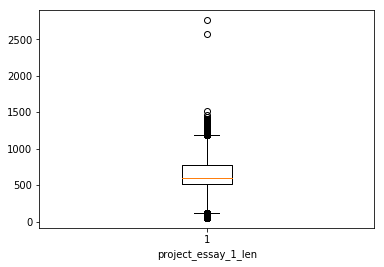

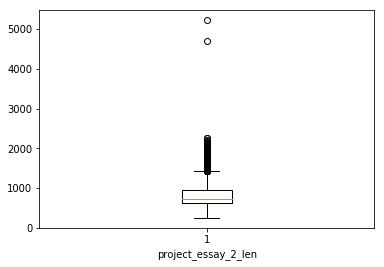

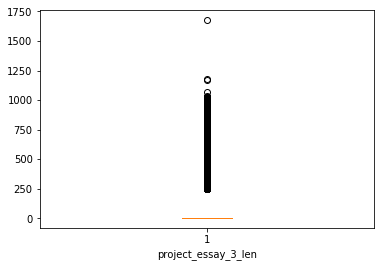

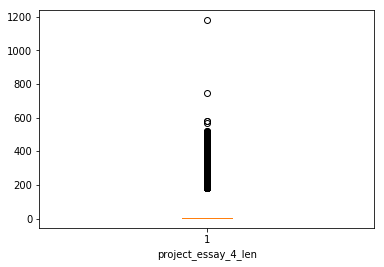

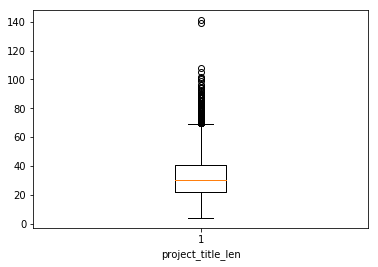

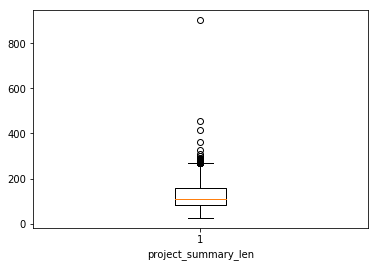

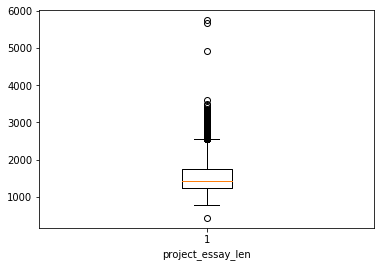

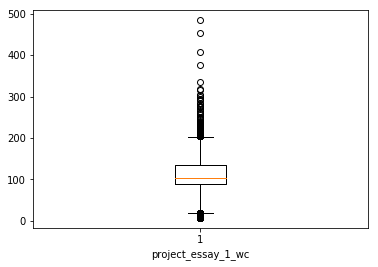

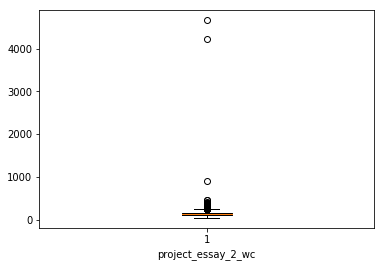

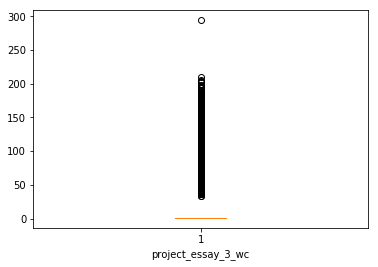

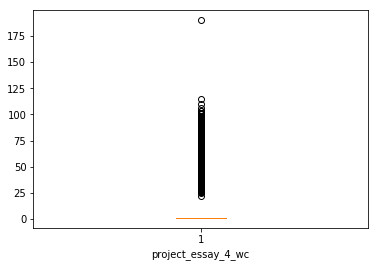

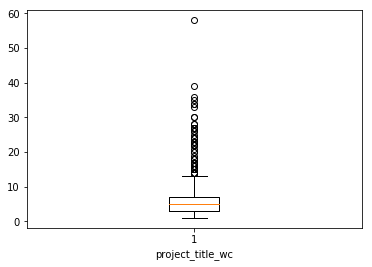

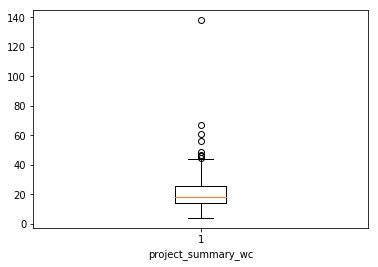

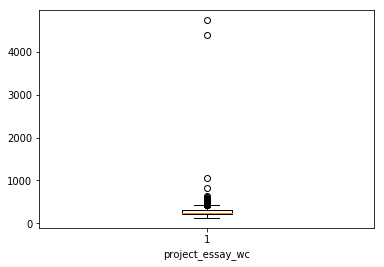

In [18]:
col = ['project_essay_1_len', 'project_essay_2_len', 'project_essay_3_len',
       'project_essay_4_len', 'project_title_len', 'project_summary_len',
       'project_essay_len', 'project_essay_1_wc', 'project_essay_2_wc',
       'project_essay_3_wc', 'project_essay_4_wc', 'project_title_wc',
       'project_summary_wc', 'project_essay_wc']

for c in col:
    plt.boxplot(train_res[c])
    plt.xlabel(c)
    plt.show()

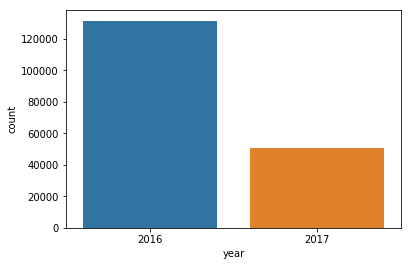

In [64]:
g = sns.countplot(x=c, data=train_res)

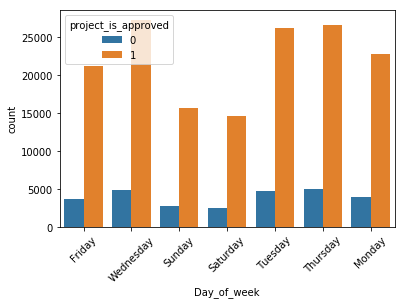

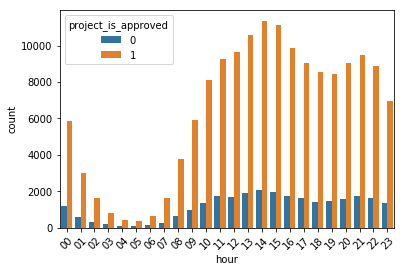

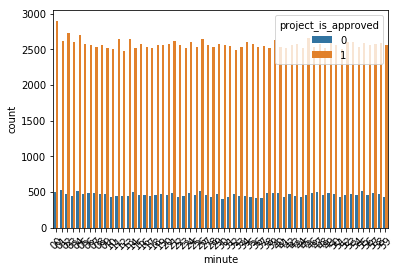

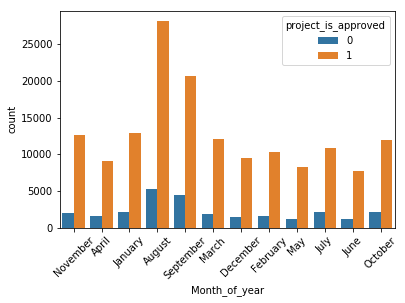

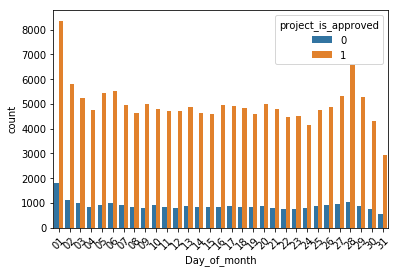

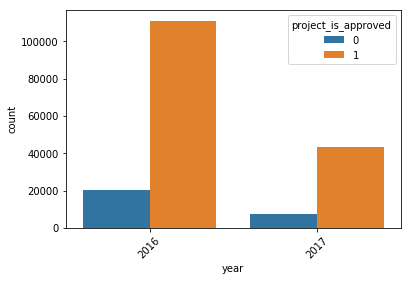

In [66]:
col = ['Day_of_week',
       'hour', 'minute', 'Month_of_year', 'Day_of_month', 'year']

for c in col:
    g = sns.countplot(x=c, hue='project_is_approved', data=train_res)
    _, label = plt.xticks()
    g.set_xticklabels(label, rotation=45)
#     plt.xlabel(c)
    plt.show()

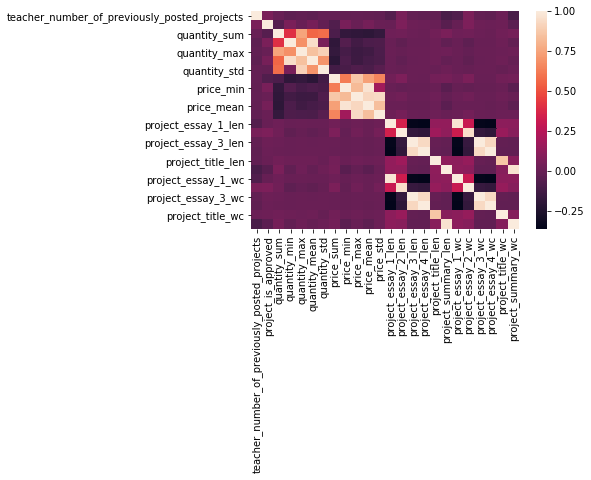

In [60]:
corr = train_res.corr()
%matplotlib inline
sns.heatmap(corr)

In [74]:
col = ['Day_of_week',
       'hour', 'minute', 'Month_of_year', 'Day_of_month', 'year']
for c in col:
    stage1 = train_res.groupby([c, 'project_is_approved']).size()
    stage2 = stage1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    print('the groupby result of column {} \n {}'.format(c, stage2))

the groupby result of column Day_of_week 
 Day_of_week  project_is_approved
Friday       0                      15.003214
             1                      84.996786
Monday       0                      14.927098
             1                      85.072902
Saturday     0                      14.650129
             1                      85.349871
Sunday       0                      14.950490
             1                      85.049510
Thursday     0                      16.074972
             1                      83.925028
Tuesday      0                      15.319094
             1                      84.680906
Wednesday    0                      15.216917
             1                      84.783083
dtype: float64
the groupby result of column hour 
 hour  project_is_approved
00    0                      16.797376
      1                      83.202624
01    0                      16.721946
      1                      83.278054
02    0                      15.673981
      1 

In [61]:
corr

,teacher_number_of_previously_posted_projects,project_is_approved,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_std,price_sum,price_min,price_max,...,project_essay_3_len,project_essay_4_len,project_title_len,project_summary_len,project_essay_1_wc,project_essay_2_wc,project_essay_3_wc,project_essay_4_wc,project_title_wc,project_summary_wc
teacher_number_of_previously_posted_projects,1.000000,0.065579,0.006949,-0.028419,-0.014626,-0.026300,-0.005699,-0.005064,-0.008026,-0.004660,...,-0.011520,-0.018981,-0.013527,-0.095095,-0.068850,0.070618,-0.011544,-0.019122,0.015710,-0.094237
project_is_approved,0.065579,1.000000,-0.053147,0.065699,0.006470,0.053502,-0.008154,-0.069199,0.057960,0.010191,...,0.019097,0.015201,0.009286,-0.045016,0.001924,0.077002,0.019455,0.015410,0.021406,-0.036229
quantity_sum,0.006949,-0.053147,1.000000,0.407554,0.752616,0.562209,0.581495,-0.082186,-0.172642,-0.184816,...,0.014248,0.012282,0.037334,0.063430,0.027513,0.031886,0.013514,0.012361,0.031718,0.049801
quantity_min,-0.028419,0.065699,0.407554,1.000000,0.690377,0.950000,0.059815,-0.183026,-0.057512,-0.120329,...,0.003887,0.005245,0.020155,-0.015051,0.005500,-0.025112,0.003539,0.005324,0.020882,-0.009635
quantity_max,-0.014626,0.006470,0.752616,0.690377,1.000000,0.850151,0.908753,-0.170251,-0.108486,-0.141361,...,0.011191,0.011630,0.023180,0.024872,0.012088,-0.003182,0.010490,0.011608,0.017369,0.021045
quantity_mean,-0.026300,0.053502,0.562209,0.950000,0.850151,1.000000,0.702922,-0.202425,-0.082284,-0.138408,...,0.006781,0.008076,0.022001,-0.003733,0.007391,-0.019841,0.006287,0.008141,0.020291,-0.000281
quantity_std,-0.005699,-0.008154,0.581495,0.059815,0.908753,0.702922,1.000000,-0.117514,-0.099924,-0.072190,...,0.010361,0.011533,0.007837,0.021846,0.005828,0.000818,0.009685,0.011476,-0.000567,0.017956
price_sum,-0.005064,-0.069199,-0.082186,-0.183026,-0.170251,-0.202425,-0.117514,1.000000,0.627522,0.869846,...,0.008367,0.004392,0.042843,0.047476,0.028913,0.066851,0.007797,0.003981,0.035554,0.044860
price_min,-0.008026,0.057960,-0.172642,-0.057512,-0.108486,-0.082284,-0.099924,0.627522,1.000000,0.826462,...,0.000096,0.000960,0.010378,-0.043479,0.002312,-0.009042,0.000217,0.001080,0.009293,-0.034420
price_max,-0.004660,0.010191,-0.184816,-0.120329,-0.141361,-0.138408,-0.072190,0.869846,0.826462,1.000000,...,0.007261,0.004987,0.026156,-0.005367,0.014137,0.032886,0.007037,0.004710,0.021362,0.003339


In [19]:
derived_text_feature = train_res.iloc[:, [x for x in range(34,47)]]
derived_text_feature['project_is_approved'] = train_res['project_is_approved']

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
derived_text_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 14 columns):
project_essay_1_len    182080 non-null int64
project_essay_2_len    182080 non-null int64
project_essay_3_len    182080 non-null int64
project_essay_4_len    182080 non-null int64
project_title_len      182080 non-null int64
project_summary_len    182080 non-null int64
project_essay_len      182080 non-null int64
project_essay_1_wc     182080 non-null int64
project_essay_2_wc     182080 non-null int64
project_essay_3_wc     182080 non-null int64
project_essay_4_wc     182080 non-null int64
project_title_wc       182080 non-null int64
project_summary_wc     182080 non-null int64
project_is_approved    182080 non-null int64
dtypes: int64(14)
memory usage: 20.8 MB


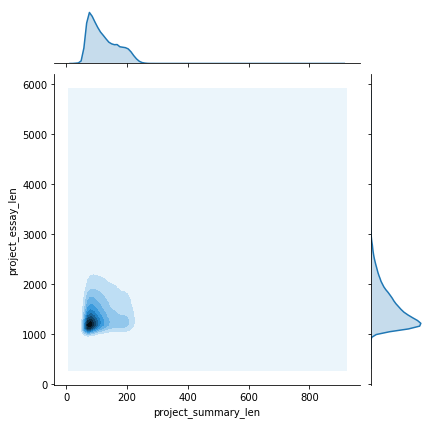

In [21]:
sns.jointplot('project_summary_len', 'project_essay_len', data=derived_text_feature, kind='kde')

In [ ]:
sns.jointplot('project_summary_len', 'project_essay_len', data=derived_text_feature, kind='kde')

In [ ]:
sns.jointplot('project_summary_len', 'project_essay_len', data=derived_text_feature, kind='kde')

In [ ]:
sns.jointplot('project_summary_len', 'project_essay_len', data=derived_text_feature, kind='kde')

In [ ]:
sns.jointplot('project_summary_len', 'project_essay_len', data=derived_text_feature, kind='kde')

In [ ]:
sns.jointplot('project_summary_len', 'project_essay_len', data=derived_text_feature, kind='kde')

In [ ]:
# %matplotlib inline
# g = sns.PairGrid(derived_text_feature, hue='project_is_approved')
# # g.map_diag(sns.kdeplot)
# # g = g.map_diag(plt.scatter)
# # g.map_offdiag(plt.kdeplot)
# g.map_upper(plt.scatter)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.hist)
# g.add_legend()
# plt.show()

In [26]:
import re
def preprocess(x):
    x = x.lower()
    
    x = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    x = re.sub(" \d+", " ", x)
    
    return x

In [28]:
string = ['AHDOJH36969 bgaskjdgka', '26174371','78543873@hkjhFGF']
# string.apply(lambda x: preprocess(x))
# string1 = list(map(preprocess, string))
string = [(lambda x: preprocess(x)) for x in string]
string1

['ahdojh36969 bgaskjdgka', '78543873 hkjhfgf']

In [31]:
train_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 46 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [32]:
train_res['project_essay'] = train_res['project_essay'].apply(lambda x: preprocess(x))
train_res['project_title'] = train_res['project_title'].apply(lambda x: preprocess(x))
train_res['project_resource_summary'] = train_res['project_resource_summary'].apply(lambda x: preprocess(x))

train_res['project_essay'] = train_res['project_essay'].apply(lambda x: preprocess(x))
train_res['project_title'] = train_res['project_title'].apply(lambda x: preprocess(x))
train_res['project_resource_summary'] = train_res['project_resource_summary'].apply(lambda x: preprocess(x))

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# col = ['project_essay', 'project_title',  'project_resource_summary']
# tfidf_feature = [3000, 400, 400]
# iterate = [0, 1, 2]


# for i, feature, c in zip(iterate, tfidf_feature, col):
#     print(i)
#     print(c)
#     print(feature)
#     tfidf = TfidfVectorizer(max_features=feature).
#     tfidf.fit(train_res[c])
    
tfidf = TfidfVectorizer(max_features=)
tfidf.fit(train_res['project_essay'])
sample = tfidf.transform(train_res.loc[:5, 'project_essay'])
sample

<6x400 sparse matrix of type '<class 'numpy.float64'>'
	with 497 stored elements in Compressed Sparse Row format>